In [27]:
import matplotlib.patches as patches
# from matplotlib.nxutils import points_inside_poly
import matplotlib.pyplot as plt
from matplotlib import mlab
import numpy as np
from scipy.stats import multivariate_normal

from skimage import io, color
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/rogerlefort/gitRepositories/Visualizing-Pathologies/ultrasound breast classification/train/benign/benign (98)-rotated1-sharpened.png'
image = io.imread(image_path)

def read_image(name):
  image = st.file_uploader("Upload an "+ name, type=["png", "jpg", "jpeg"])
  if image:
    im = Image.open(image)
    im.filename = image.name
    return im

def create_contour_mask_with_manual_threshold(image_path, threshold_value):
    """
    Create a contour mask for an image with a manually set threshold value.

    Parameters:
    - image_path: Path to the image file.
    - threshold_value: Manually set threshold value (between 0 and 255).

    Returns:
    - A matplotlib figure containing the original image and the mask with inverted colors.
    """
    # Load the image
    image = io.imread(image_path)
    gray_image = color.rgb2gray(image) if len(image.shape) == 3 else image

    # Apply manual thresholding
    _, thresh = cv2.threshold((gray_image * 255).astype(np.uint8), threshold_value, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask image
    mask = np.zeros_like(gray_image)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Invert the colors on the mask
    inverted_mask = 255 - mask

    # # Display the results
    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    # ax[0].imshow(gray_image, cmap='gray')
    # ax[0].set_title('Original Image')
    # ax[1].imshow(inverted_mask, cmap='gray')
    # ax[1].set_title('Inverted Mask with Threshold {}'.format(threshold_value))
    # plt.tight_layout()

    # Display the inverted mask with no axes
    plt.figure(figsize=(6, 6))
    plt.imshow(inverted_mask, cmap='gray')
    plt.axis('off')  # Remove axes
    plt.show() 

    return inverted_mask

# Example usage with a manual threshold value
# create_contour_mask_with_manual_threshold(image_path, 128) # You can call this function with the desired threshold value.
# Note: This line is commented out because it's meant to show how you can use the function. To execute it, remove the comment and replace `128` with your desired threshold value.

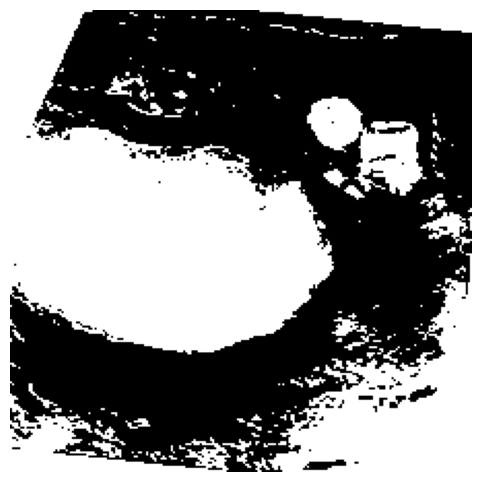

In [43]:
mask = create_contour_mask_with_manual_threshold(image_path, 90)